In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

tr = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
tr.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## EDA

In [ ]:
tr.isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [ ]:
x=['BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath']

tr[x].isnull().mean()*100

BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinSF1      0.000000
BsmtFinType2    2.602740
BsmtFinSF2      0.000000
BsmtUnfSF       0.000000
TotalBsmtSF     0.000000
Heating         0.000000
HeatingQC       0.000000
CentralAir      0.000000
Electrical      0.068493
1stFlrSF        0.000000
2ndFlrSF        0.000000
LowQualFinSF    0.000000
GrLivArea       0.000000
BsmtFullBath    0.000000
BsmtHalfBath    0.000000
FullBath        0.000000
HalfBath        0.000000
dtype: float64

In [ ]:
tr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


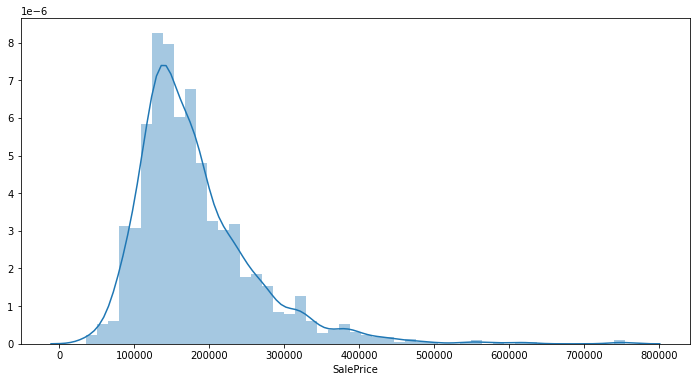

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(tr['SalePrice'])

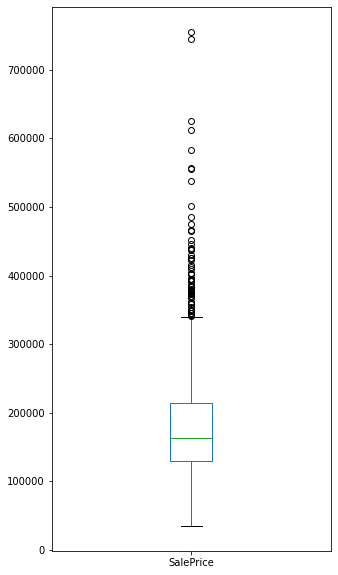

In [ ]:
plt.figure(figsize=(5,10))
tr['SalePrice'].plot.box()

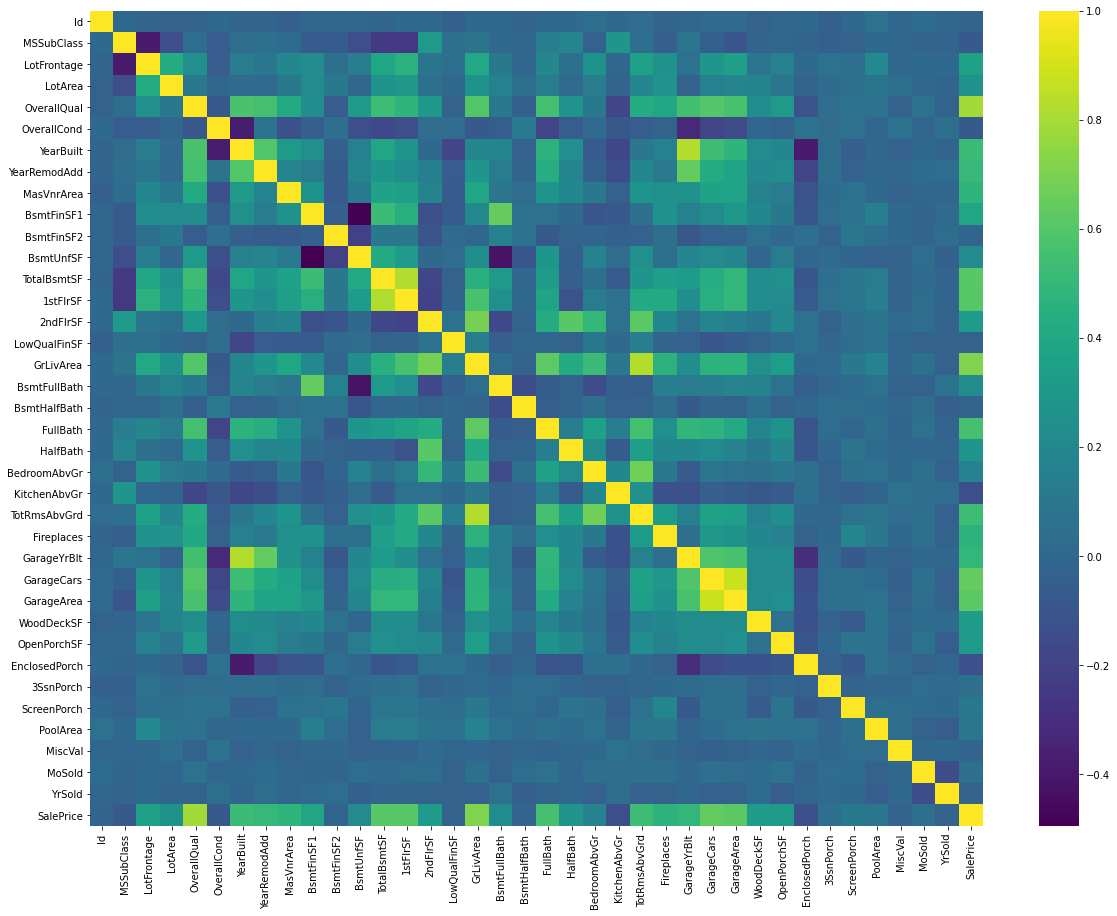

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(tr.corr(),cmap='viridis')

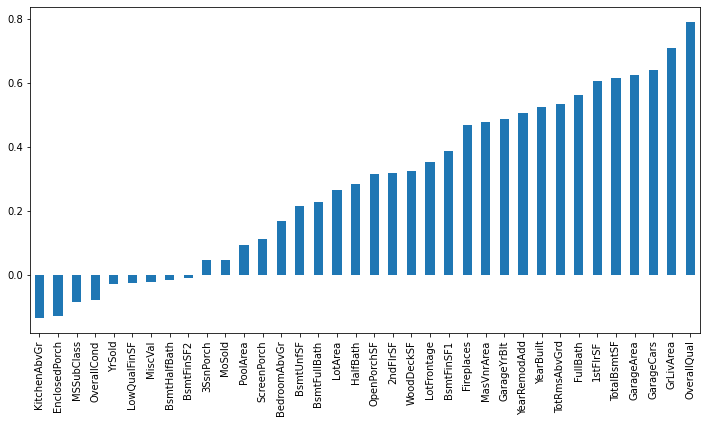

In [ ]:
plt.figure(figsize=(12,6))
tr.corr()['SalePrice'].sort_values().drop(['Id','SalePrice']).plot(kind='bar')

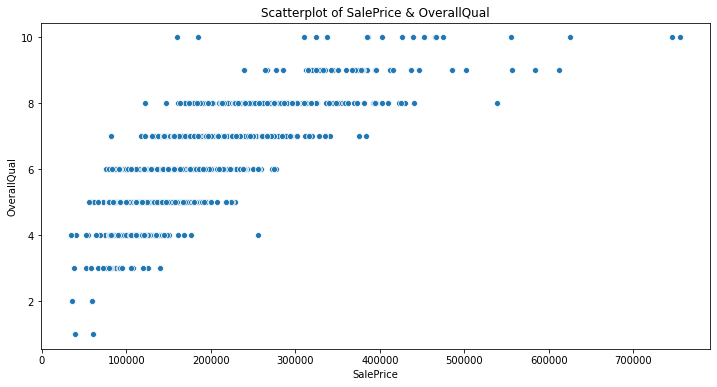

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(tr['SalePrice'],tr['OverallQual'])
plt.title('Scatterplot of SalePrice & OverallQual')
plt.show()

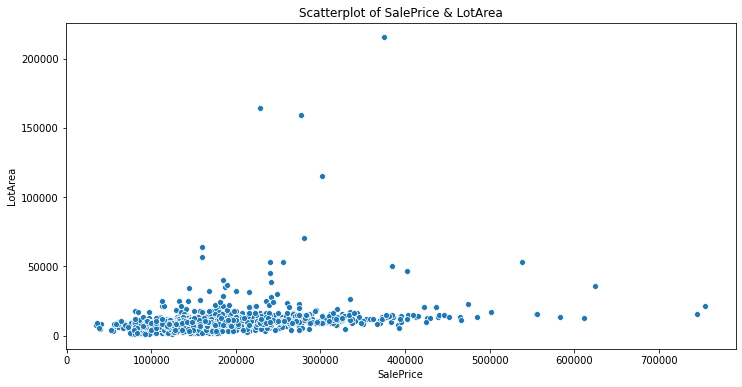

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(tr['SalePrice'],tr['LotArea'])
plt.title('Scatterplot of SalePrice & LotArea')
plt.show()

## Pre-processing

In [ ]:
ob = tr.select_dtypes(['object']).columns
int_float = tr.select_dtypes(exclude=['object']).columns

int_float = pd.DataFrame(int_float,columns=['Int/Float'])
ob = pd.DataFrame(ob,columns=['Object'])

tr_type = pd.concat([int_float,ob],axis=1)

tr_type

,Int/Float,Object
0,Id,MSZoning
1,MSSubClass,Street
2,LotFrontage,Alley
3,LotArea,LotShape
4,OverallQual,LandContour
5,OverallCond,Utilities
6,YearBuilt,LotConfig
7,YearRemodAdd,LandSlope
8,MasVnrArea,Neighborhood
9,BsmtFinSF1,Condition1


#### Missing data in int/float 

In [ ]:
x = pd.DataFrame(tr.corr()['SalePrice'])

y = pd.DataFrame(tr.select_dtypes(exclude=['object']).isnull().mean()*100,columns=['Missing values'])

a = pd.concat([x,y],axis=1)

a

,SalePrice,Missing values
Id,-0.021917,0.000000
MSSubClass,-0.084284,0.000000
LotFrontage,0.351799,17.739726
LotArea,0.263843,0.000000
OverallQual,0.790982,0.000000
OverallCond,-0.077856,0.000000
YearBuilt,0.522897,0.000000
YearRemodAdd,0.507101,0.000000
MasVnrArea,0.477493,0.547945
BsmtFinSF1,0.386420,0.000000


###### Replace Missing Data

In [ ]:
def impute_ft(cols):
    LotFrontage = cols[0]
    Street = cols[1]
    
    if pd.isnull(LotFrontage):

        if Street == 'Pave':
            return 70.0

        else:
            return 85.0

    else:
        return LotFrontage

In [ ]:
tr['LotFrontage'] = tr[['LotFrontage','Street']].apply(impute_ft,axis=1)

In [ ]:
def impute_year(cols):
    GarageYrBlt = cols[0]
    YearBuilt = cols[1]
    
    if pd.isnull(GarageYrBlt):
        
        GarageYrBlt = YearBuilt
        return GarageYrBlt
        
    else:
        return GarageYrBlt

In [ ]:
tr['GarageYrBlt'] = tr[['GarageYrBlt','YearBuilt']].apply(impute_year,axis=1)

In [ ]:
def impute_area(cols):
    MasVnrArea = cols[0]
    MasVnrType = cols[1]
    
    if pd.isnull(MasVnrArea):

        if MasVnrType == 'BrkCmn':
            return 248.0
        elif MasVnrType == 'BrkFace':
            return 259.0
        elif MasVnrType == 'None':
            return 1.0
        elif MasVnrType == 'Stone':
            return 239.0
        else:
            return 0.0
        
    else:
        return MasVnrArea

In [ ]:
tr['MasVnrArea'] = tr[['MasVnrArea','MasVnrType']].apply(impute_area,axis=1)

#### Missing data in object

In [ ]:
b = pd.DataFrame((tr.select_dtypes(['object']).isnull().mean().sort_values())*100,columns=['Missing values'])

b

,Missing values
MSZoning,0.000000
PavedDrive,0.000000
Functional,0.000000
KitchenQual,0.000000
CentralAir,0.000000
HeatingQC,0.000000
Heating,0.000000
SaleType,0.000000
Foundation,0.000000
ExterCond,0.000000


In [ ]:
tr['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [ ]:
tr[['PoolArea','PoolQC']].head()

# drop

,PoolArea,PoolQC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN


In [ ]:
tr['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [ ]:
nan = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu', 'GarageType',
       'GarageFinish','GarageQual','GarageCond','Fence']

for x in nan:
    tr[x].fillna(value='NA',inplace=True)

In [ ]:
tr.drop(['MiscFeature','PoolQC'],axis=1,inplace=True)

In [ ]:
tr.dropna(inplace=True)

#### Categorical Variables and Dummy Variables

In [ ]:
cat = []
for x in tr.select_dtypes(['object']).columns:
    cat.append(x)

dummies = pd.get_dummies(tr[cat],drop_first=True)

In [ ]:
#tr = pd.concat([tr.drop(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],axis=1),dummies],axis=1)

In [ ]:
tr = pd.concat([tr.drop(cat,axis=1),dummies],axis=1)

## MODEL

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = tr.drop(['Id', 'SalePrice'],axis=1).values

y = tr['SalePrice'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

## Creating Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

### Model v1 (Base)

In [ ]:
model = Sequential()

# input layer
model.add(Dense(252,  activation='relu'))


# hidden layer
model.add(Dense(252, activation='relu'))


# hidden layer
model.add(Dense(252, activation='relu'))


# hidden layer
model.add(Dense(252, activation='relu'))


# output layer
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam',loss='mse')

Training the Model

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=400)

Train on 1160 samples, validate on 291 samples
Epoch 1/400
1160/1160 [==============================] - 1s 571us/sample - loss: 37519827819.6965 - val_loss: 40897138096.8247
Epoch 2/400
1160/1160 [==============================] - 0s 140us/sample - loss: 18948611474.5379 - val_loss: 7822313704.2474
Epoch 3/400
1160/1160 [==============================] - 0s 139us/sample - loss: 4347376002.6483 - val_loss: 5328013150.1306
Epoch 4/400
1160/1160 [==============================] - 0s 137us/sample - loss: 2999359917.9034 - val_loss: 4296388244.2337
Epoch 5/400
1160/1160 [==============================] - 0s 138us/sample - loss: 2290470068.5241 - val_loss: 3657944867.1890
Epoch 6/400
1160/1160 [==============================] - 0s 131us/sample - loss: 1897885422.3448 - val_loss: 3474761368.4124
Epoch 7/400
1160/1160 [==============================] - 0s 149us/sample - loss: 1634252295.9448 - val_loss: 2953296299.5464
Epoch 8/400
1160/1160 [==============================] - 0s 132us/sample - 

Evaluate Model

In [ ]:
losses = pd.DataFrame(model.history.history)

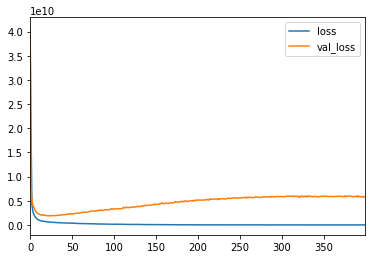

In [ ]:
losses.plot()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
mean_absolute_error(y_test,predictions)

24955.341897551545

In [ ]:
explained_variance_score(y_test,predictions)

0.25866579811714707

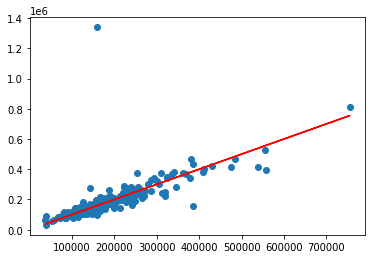

In [ ]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

### Model v2 (add Dropout)

In [ ]:
model = Sequential()

# input layer
model.add(Dense(252,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(252, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(252, activation='relu'))
model.add(Dropout(0.25))

# hidden layer
model.add(Dense(252, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=400)

Train on 1160 samples, validate on 291 samples
Epoch 1/400
1160/1160 [==============================] - 1s 715us/sample - loss: 37441466255.0069 - val_loss: 40006285994.6667
Epoch 2/400
1160/1160 [==============================] - 0s 186us/sample - loss: 16235637880.0552 - val_loss: 6420984705.3196
Epoch 3/400
1160/1160 [==============================] - 0s 170us/sample - loss: 4025344939.2552 - val_loss: 5127004606.9003
Epoch 4/400
1160/1160 [==============================] - 0s 173us/sample - loss: 2987898662.8414 - val_loss: 4098460712.4674
Epoch 5/400
1160/1160 [==============================] - 0s 162us/sample - loss: 2439842660.6345 - val_loss: 3529339196.7010
Epoch 6/400
1160/1160 [==============================] - 0s 164us/sample - loss: 1971834906.4828 - val_loss: 3090784722.2543
Epoch 7/400
1160/1160 [==============================] - 0s 166us/sample - loss: 1679695442.0966 - val_loss: 2806246056.6873
Epoch 8/400
1160/1160 [==============================] - 0s 169us/sample - 

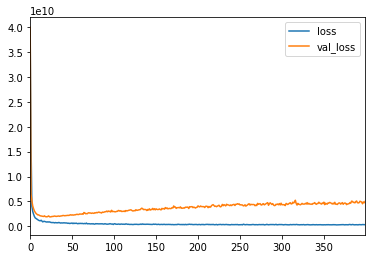

In [ ]:
losses = pd.DataFrame(model.history.history)

losses.plot()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,predictions)

21257.328057882303

In [ ]:
explained_variance_score(y_test,predictions)

0.3696361258305534

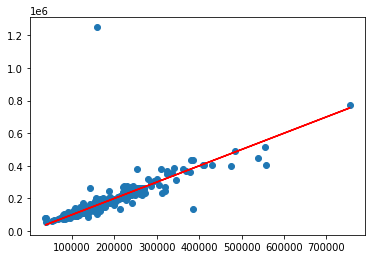

In [ ]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

### Model v3 (epoch = 200)

In [ ]:
model = Sequential()

# input layer
model.add(Dense(252,  activation='relu'))


# hidden layer
model.add(Dense(252, activation='relu'))


# hidden layer
model.add(Dense(252, activation='relu'))


# hidden layer
model.add(Dense(252, activation='relu'))


# output layer
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=200)

Train on 1160 samples, validate on 291 samples
Epoch 1/200
1160/1160 [==============================] - 1s 683us/sample - loss: 37425285805.0207 - val_loss: 40234740450.9691
Epoch 2/200
1160/1160 [==============================] - 0s 137us/sample - loss: 17410165484.5793 - val_loss: 6780788924.2612
Epoch 3/200
1160/1160 [==============================] - 0s 147us/sample - loss: 4089432707.5310 - val_loss: 5213486092.3162
Epoch 4/200
1160/1160 [==============================] - 0s 163us/sample - loss: 2910024281.1586 - val_loss: 4292552864.5498
Epoch 5/200
1160/1160 [==============================] - 0s 142us/sample - loss: 2253043374.7862 - val_loss: 3644544779.4364
Epoch 6/200
1160/1160 [==============================] - 0s 136us/sample - loss: 1880741364.5241 - val_loss: 3238972220.9210
Epoch 7/200
1160/1160 [==============================] - 0s 137us/sample - loss: 1619978130.0966 - val_loss: 2939012781.4158
Epoch 8/200
1160/1160 [==============================] - 0s 142us/sample - 

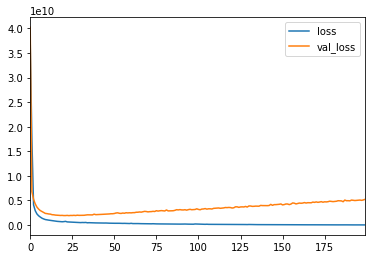

In [ ]:
losses = pd.DataFrame(model.history.history)

losses.plot()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,predictions)

22939.945943406357

In [ ]:
explained_variance_score(y_test,predictions)

0.3401169345872955

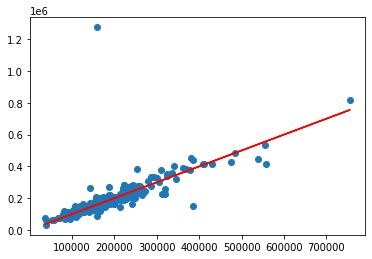

In [ ]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

### Model v4 (add Dropout, epoch = 200)

In [ ]:
model = Sequential()

# input layer
model.add(Dense(252,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(252, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(252, activation='relu'))
model.add(Dropout(0.25))

# hidden layer
model.add(Dense(252, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=200)

Train on 1160 samples, validate on 291 samples
Epoch 1/200
1160/1160 [==============================] - 1s 821us/sample - loss: 37408868676.8552 - val_loss: 39773305993.2371
Epoch 2/200
1160/1160 [==============================] - 0s 167us/sample - loss: 15994825883.3655 - val_loss: 6530336480.3299
Epoch 3/200
1160/1160 [==============================] - 0s 172us/sample - loss: 4102783466.8138 - val_loss: 5134425721.2921
Epoch 4/200
1160/1160 [==============================] - 0s 165us/sample - loss: 3105908916.9655 - val_loss: 4037061565.1409
Epoch 5/200
1160/1160 [==============================] - 0s 169us/sample - loss: 2327583438.5655 - val_loss: 3497978401.4296
Epoch 6/200
1160/1160 [==============================] - 0s 176us/sample - loss: 2146752615.7241 - val_loss: 3174546891.2165
Epoch 7/200
1160/1160 [==============================] - 0s 173us/sample - loss: 1753111350.9517 - val_loss: 2783203765.2234
Epoch 8/200
1160/1160 [==============================] - 0s 166us/sample - 

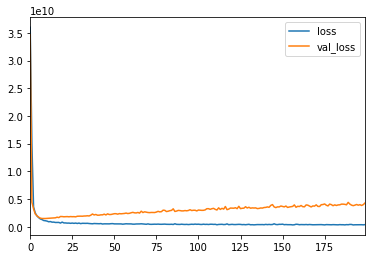

In [ ]:
losses = pd.DataFrame(model.history.history)

losses.plot()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,predictions)

21904.728669995704

In [ ]:
explained_variance_score(y_test,predictions)

0.46497824947332844

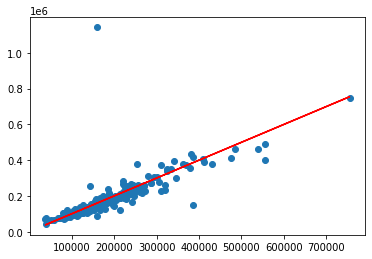

In [ ]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

### Model v5 (remove outliers, add Dropout, epoch = 200)


In [ ]:
tr['SalePrice'].sort_values(ascending=False).head(20)

691     755000
1182    745000
1169    625000
898     611657
803     582933
1046    556581
440     555000
769     538000
178     501837
798     485000
185     475000
1373    466500
591     451950
527     446261
473     440000
58      438780
349     437154
496     430000
389     426000
1142    424870
Name: SalePrice, dtype: int64

In [ ]:
non_one_percent = tr[tr['SalePrice']<500000]

In [ ]:
X = non_one_percent.drop(['Id', 'SalePrice'],axis=1).values

y = non_one_percent['SalePrice'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()

# input layer
model.add(Dense(252,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(252, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(252, activation='relu'))
model.add(Dropout(0.25))

# hidden layer
model.add(Dense(252, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=200)

Train on 1153 samples, validate on 289 samples
Epoch 1/200
1153/1153 [==============================] - 1s 1ms/sample - loss: 36028213612.1284 - val_loss: 34686620576.3322
Epoch 2/200
1153/1153 [==============================] - 0s 193us/sample - loss: 14992153833.7415 - val_loss: 4425607387.6817
Epoch 3/200
1153/1153 [==============================] - 0s 178us/sample - loss: 3565326158.5984 - val_loss: 3216960549.2042
Epoch 4/200
1153/1153 [==============================] - 0s 196us/sample - loss: 2481609490.2064 - val_loss: 2300817701.3149
Epoch 5/200
1153/1153 [==============================] - 0s 183us/sample - loss: 1946107663.3270 - val_loss: 1977982087.6683
Epoch 6/200
1153/1153 [==============================] - 0s 183us/sample - loss: 1641405519.7918 - val_loss: 1720287934.4498
Epoch 7/200
1153/1153 [==============================] - 0s 185us/sample - loss: 1397844092.2376 - val_loss: 1538497141.8131
Epoch 8/200
1153/1153 [==============================] - 0s 182us/sample - lo

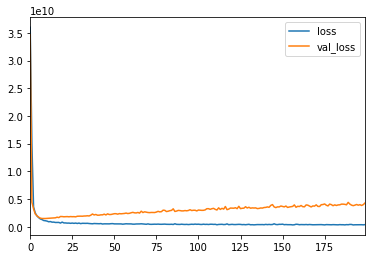

In [ ]:
losses = pd.DataFrame(model.history.history)

losses.plot()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,predictions)

19601.983645112457

In [ ]:
explained_variance_score(y_test,predictions)

0.2375391817187359

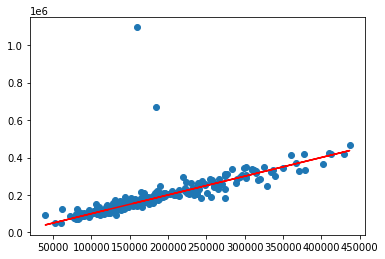

In [ ]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

### Model v6 (add Dropout, epoch = 100)


In [ ]:
model = Sequential()

# input layer
model.add(Dense(252,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(252, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(252, activation='relu'))
model.add(Dropout(0.25))

# hidden layer
model.add(Dense(252, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=100)

Train on 1153 samples, validate on 289 samples
Epoch 1/100
1153/1153 [==============================] - 1s 1ms/sample - loss: 35974862144.6106 - val_loss: 34267461128.8581
Epoch 2/100
1153/1153 [==============================] - 0s 178us/sample - loss: 14149215906.5811 - val_loss: 4414595799.5709
Epoch 3/100
1153/1153 [==============================] - 0s 189us/sample - loss: 3469440223.2507 - val_loss: 3202440238.0623
Epoch 4/100
1153/1153 [==============================] - 0s 181us/sample - loss: 2472577262.1544 - val_loss: 2261110782.0069
Epoch 5/100
1153/1153 [==============================] - 0s 179us/sample - loss: 1889083004.1700 - val_loss: 1879983906.5467
Epoch 6/100
1153/1153 [==============================] - 0s 182us/sample - loss: 1679531031.9931 - val_loss: 1681149826.4360
Epoch 7/100
1153/1153 [==============================] - 0s 175us/sample - loss: 1392137090.1093 - val_loss: 1549228479.0588
Epoch 8/100
1153/1153 [==============================] - 0s 186us/sample - lo

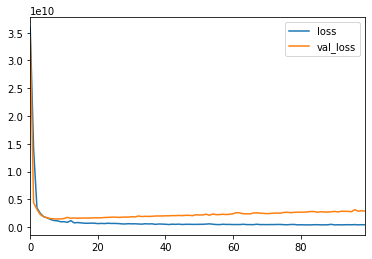

In [ ]:
losses = pd.DataFrame(model.history.history)

losses.plot()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,predictions)

18343.025681228373

In [ ]:
explained_variance_score(y_test,predictions)

0.4759932102791806

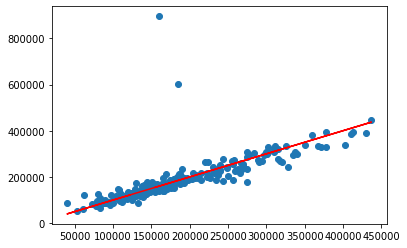

In [ ]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

### Model v7 (add batch = 128, add Dropout, epoch = 100)


In [ ]:
model = Sequential()

# input layer
model.add(Dense(252,  activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(252, activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(252, activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(252, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=100)

Train on 1153 samples, validate on 289 samples
Epoch 1/100
1153/1153 [==============================] - 2s 2ms/sample - loss: 36449483039.7502 - val_loss: 38207000590.1730
Epoch 2/100
1153/1153 [==============================] - 0s 102us/sample - loss: 36425117752.8395 - val_loss: 38117941786.5744
Epoch 3/100
1153/1153 [==============================] - 0s 100us/sample - loss: 36180447544.6175 - val_loss: 37386075933.2318
Epoch 4/100
1153/1153 [==============================] - 0s 91us/sample - loss: 34617480926.4735 - val_loss: 33548733649.0519
Epoch 5/100
1153/1153 [==============================] - 0s 93us/sample - loss: 28275571130.2827 - val_loss: 21922024061.7855
Epoch 6/100
1153/1153 [==============================] - 0s 88us/sample - loss: 13767292494.0226 - val_loss: 5574332481.5502
Epoch 7/100
1153/1153 [==============================] - 0s 96us/sample - loss: 6088927342.1266 - val_loss: 5316403664.1661
Epoch 8/100
1153/1153 [==============================] - 0s 94us/sample -

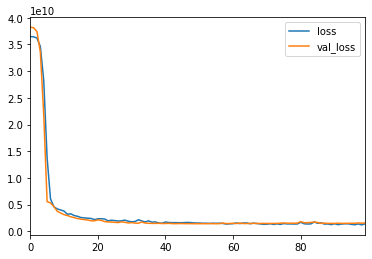

In [ ]:
losses = pd.DataFrame(model.history.history)

losses.plot()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,predictions)

22566.06801470588

In [ ]:
explained_variance_score(y_test,predictions)

0.7292653505192366

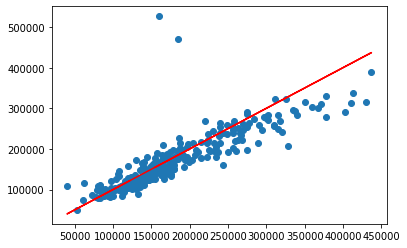

In [ ]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

## MODEL CHOSEN: Model v7

In [ ]:
X = tr.drop(['Id', 'SalePrice'],axis=1)

In [ ]:
idx = [36,42,51,121,136,152,168,173,178,183,190,211,215,222,228,243,251,256]
columns = ['MSZoning_C (all)','Alley_Grvl','Utilities_AllPub','Exterior1st_AsbShng','Exterior2nd_AsbShng',
           'MasVnrType_BrkCmn','BsmtQual_Ex','BsmtCond_Fa','BsmtExposure_Av','BsmtFinType1_ALQ',
           'BsmtFinType2_ALQ','KitchenQual_Ex','Functional_Maj1','FireplaceQu_Ex','GarageType_2Types',
           'GarageCond_Ex','Fence_GdPrv','SaleType_COD']

zeros = [0]*1451

for m,n in zip(idx,columns):
    X.insert(loc=m, column=n, value=zeros)     # re-enter column that was removed

In [ ]:
y = tr['SalePrice'].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X)

In [ ]:
X_train.shape

(1451, 270)

In [ ]:
model = Sequential()

# input layer
model.add(Dense(270,  activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(270, activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(270, activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(270, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y,
          batch_size=128,
          epochs=100)

Train on 1451 samples
Epoch 1/100
1451/1451 [==============================] - 0s 250us/sample - loss: 38907540583.7409
Epoch 2/100
1451/1451 [==============================] - 0s 91us/sample - loss: 38793633227.4238
Epoch 3/100
1451/1451 [==============================] - 0s 96us/sample - loss: 37356592906.4094
Epoch 4/100
1451/1451 [==============================] - 0s 96us/sample - loss: 28353811177.2405
Epoch 5/100
1451/1451 [==============================] - 0s 97us/sample - loss: 9172380617.3067
Epoch 6/100
1451/1451 [==============================] - 0s 96us/sample - loss: 7011113519.9890
Epoch 7/100
1451/1451 [==============================] - 0s 83us/sample - loss: 5638096671.4045
Epoch 8/100
1451/1451 [==============================] - 0s 91us/sample - loss: 4769567348.4438
Epoch 9/100
1451/1451 [==============================] - 0s 103us/sample - loss: 4274795420.8463
Epoch 10/100
1451/1451 [==============================] - 0s 90us/sample - loss: 3832037465.4500
Epoch 11/10

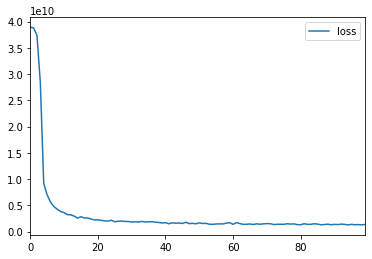

In [ ]:
losses = pd.DataFrame(model.history.history)

losses.plot()

## SUBMIT

In [ ]:
tt = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/test.csv')

In [ ]:
y = pd.DataFrame(tt.select_dtypes(exclude=['object']).isnull().mean()*100,columns=['Missing values'])

y

,Missing values
Id,0.000000
MSSubClass,0.000000
LotFrontage,15.558602
LotArea,0.000000
OverallQual,0.000000
OverallCond,0.000000
YearBuilt,0.000000
YearRemodAdd,0.000000
MasVnrArea,1.028101
BsmtFinSF1,0.068540


### Missing test data in int/float

In [ ]:
def impute_ft_test(cols):
    LotFrontage = cols[0]
    Street = cols[1]
    
    if pd.isnull(LotFrontage):

        if Street == 'Pave':
            return 69.0

        else:
            return 91.0

    else:
        return LotFrontage

In [ ]:
tt['LotFrontage'] = tt[['LotFrontage','Street']].apply(impute_ft_test,axis=1)

In [ ]:
def impute_area_test(cols):
    MasVnrArea = cols[0]
    MasVnrType = cols[1]
    
    if pd.isnull(MasVnrArea):

        if MasVnrType == 'BrkCmn':
            return 117.0
        elif MasVnrType == 'BrkFace':
            return 264.0
        elif MasVnrType == 'Unknown':
            return 198.0
        elif MasVnrType == 'Stone':
            return 240.0
        else:
            return 0.0
        
    else:
        return MasVnrArea

In [ ]:
tt['MasVnrArea'] = tt[['MasVnrArea','MasVnrType']].apply(impute_area_test,axis=1)

In [ ]:
def impute_bsmtf1(cols):
    BsmtFinSF1 = cols[0]
    BsmtFinType1 = cols[1]
    
    if pd.isnull(BsmtFinSF1):

        if BsmtFinType1 == 'ALQ':
            return 622.0
        elif BsmtFinType1 == 'BLQ':
            return 517.0
        elif BsmtFinType1 == 'GLQ':
            return 814.0
        elif BsmtFinType1 == 'LwQ':
            return 394.0
        elif BsmtFinType1 == 'Rec':
            return 422.0
        else:
            return 0.0
        
    else:
        return BsmtFinSF1

In [ ]:
tt['BsmtFinSF1'] = tt[['BsmtFinSF1','BsmtFinType1']].apply(impute_bsmtf1,axis=1)

In [ ]:
def impute_bsmtf2(cols):
    BsmtFinSF2 = cols[0]
    BsmtFinType2 = cols[1]
    
    if pd.isnull(BsmtFinSF2):

        if BsmtFinType2 == 'ALQ':
            return 521.0
        elif BsmtFinType2 == 'BLQ':
            return 370.0
        elif BsmtFinType2 == 'GLQ':
            return 769.0
        elif BsmtFinType2 == 'LwQ':
            return 315.0
        elif BsmtFinType2 == 'Rec':
            return 358.0
        else:
            return 0.0
        
    else:
        return BsmtFinSF2

In [ ]:
tt['BsmtFinSF2'] = tt[['BsmtFinSF2','BsmtFinType2']].apply(impute_bsmtf2,axis=1)

In [ ]:
def impute_total(cols):
    TotalBsmtSF = cols[0]
    BsmtFinSF1 = cols[1]
    BsmtFinSF2 = cols[2]
    
    if pd.isnull(TotalBsmtSF):
        
        TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2
        return TotalBsmtSF
        
    else:
        return TotalBsmtSF

In [ ]:
tt['TotalBsmtSF'] = tt[['TotalBsmtSF','BsmtFinSF1','BsmtFinSF2']].apply(impute_total,axis=1)

In [ ]:
def impute_unfin(cols):
    BsmtUnfSF = cols[0]
    TotalBsmtSF = cols[1]
    BsmtFinSF1 = cols[2]
    BsmtFinSF2 = cols[3]
    
    if pd.isnull(BsmtUnfSF):
        
        BsmtUnfSF = TotalBsmtSF - BsmtFinSF1 - BsmtFinSF2
        return BsmtUnfSF
        
    else:
        return BsmtUnfSF

In [ ]:
tt['BsmtUnfSF'] = tt[['BsmtUnfSF','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2']].apply(impute_unfin,axis=1)

In [ ]:
def impute_fullbath(cols):
    BsmtFullBath = cols[0]
    FullBath = cols[1]
    
    if pd.isnull(BsmtFullBath):

        if FullBath == 0:
            return 2.0
        elif FullBath == 4:
            return 2.0
        
        else:
            return 0.0
        
    else:
        return BsmtFullBath

In [ ]:
tt['BsmtFullBath'] = tt[['BsmtFullBath','FullBath']].apply(impute_fullbath,axis=1)

In [ ]:
def impute_halfbath(cols):
    BsmtHalfBath = cols[0]
    HalfBath = cols[1]
    
    if pd.isnull(BsmtHalfBath):

        if HalfBath == 0:
            return 1.0
        
        else:
            return 0.0
        
    else:
        return BsmtHalfBath

In [ ]:
tt['BsmtHalfBath'] = tt[['BsmtHalfBath','HalfBath']].apply(impute_halfbath,axis=1)

In [ ]:
tt['GarageYrBlt'] = tt[['GarageYrBlt','YearBuilt']].apply(impute_year,axis=1)

In [ ]:
tt.fillna(value=0.0,inplace=True)

### Missing test data in object

In [ ]:
z = pd.DataFrame(tt.select_dtypes('object').isnull().mean()*100,columns=['Missing values'])

z

,Missing values
MSZoning,0.0
Street,0.0
Alley,0.0
LotShape,0.0
LandContour,0.0
Utilities,0.0
LotConfig,0.0
LandSlope,0.0
Neighborhood,0.0
Condition1,0.0


In [ ]:
tt.drop(['MiscFeature','PoolQC'],axis=1,inplace=True)

### Categorical Variables and Dummy Variables in Test Data

In [ ]:
cat = []
for x in tt.select_dtypes(['object']).columns:
    cat.append(x)

dummies = pd.get_dummies(tt[cat],drop_first=True)

In [ ]:
tt = pd.concat([tt.drop(cat,axis=1),dummies],axis=1)

### Predict

In [ ]:
X_test = tt.drop('Id',axis=1)

In [ ]:
idx = [43,52,95,96,97,104,114,115,116,117,128,131,145,171,175,181,187,194,197,200,209,225,234,240,246,255]
columns = ['Alley_NA','Utilities_NoSeWa','Condition2_RRAe','Condition2_RRAn','Condition2_RRNn',
           'HouseStyle_2.5Fin','RoofMatl_CompShg','RoofMatl_Membran','RoofMatl_Metal','RoofMatl_Roll',
           'Exterior1st_ImStucc','Exterior1st_Stone','Exterior2nd_Other','BsmtQual_NA','BsmtCond_NA',
           'BsmtExposure_NA','BsmtFinType1_NA','BsmtFinType2_NA','Heating_GasA','Heating_OthW','Electrical_Mix',
           'FireplaceQu_NA','GarageType_NA','GarageQual_NA','GarageCond_NA','Fence_NA']

zeros = [0]*1459

for m,n in zip(idx,columns):
    X_test.insert(loc=m, column=n, value=zeros)     # re-enter column that was removed

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
output = pd.DataFrame(predictions,columns=['SalePrice'])

In [ ]:
test_id = pd.DataFrame(tt['Id'])

In [ ]:
output = pd.concat([test_id,output],axis=1)

In [ ]:
output.to_csv('/content/gdrive/My Drive/Colab Notebooks/housing_submission_v2.csv')